In [1]:
# Importación de Librerías Principales para el Análisis
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
# Lectura de Dataset 

# Arreglo con los nombres de las columnas que tienen distintos tipos
columnas_prob = ['approxdate', 'resolution', 'attacktype2_txt', 'attacktype3_txt', 
                 'gsubname2', 'gname3', 'gsubname3', 'claimmode2_txt',
                 'claimmode3_txt', 'weaptype3_txt', 'weapsubtype3_txt', 
                 'weaptype4_txt', 'weapsubtype4_txt', 'divert', 'kidhijcountry', 
                 'ransomnote']
tipos = dict.fromkeys(columnas_prob, str)

# Creación de dataframe inicial en base al csv 
data_inicial = pd.read_csv(r"./terrorism.csv", encoding='latin', dtype=tipos)

In [3]:
# Agarrar solo los registros del 2012 en adelante 
# Esto se hace porque START empezó a recopilar datos formalmente desde esta fecha 
# Incluso se puede verificar que el total de registros de 2012 a 2018 son el 40%, proporcionalmente no se puede comparar 
# con los registros anterirores. 
data_general = data_inicial[data_inicial['iyear'] >= 2012]

# DIMENSIONES DEL DATASET 
data_general.shape

(76913, 135)

In [4]:
# Que tipos tienen las variables 
data_general.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [5]:
# CANTIDAD DE NULOS 
data_general.isna().sum()

eventid                   0
iyear                     0
imonth                    0
iday                      0
approxdate            68077
extended                  0
resolution            76913
country                   0
country_txt               0
region                    0
region_txt                0
provstate                 2
city                      0
latitude                479
longitude               479
specificity               0
vicinity                  0
location              43382
summary                   0
crit1                     0
crit2                     0
crit3                     0
doubtterr                 1
alternative           62569
alternative_txt       62569
multiple                  1
success                   0
suicide                   0
attacktype1               0
attacktype1_txt           0
attacktype2           73473
attacktype2_txt       73473
attacktype3           76673
attacktype3_txt       76673
targtype1                 0
targtype1_txt       

In [6]:
# Verificar cuántos nulos hay por columna para ver si hay alguna que definitivamente hay que eliminar 

# Eliminación de Columnas que son completamente nulas
# Además verifiqué cuales variables que tienen más del 60% de los datos nulos son importantes y cuales no. 
# importantes: alternative, alternative_txt, claimmode, claimmodetxt, 
for i in data_general:
    cantidad = data_general[i].isna().sum()
    proporcion = np.round(cantidad / data_general.shape[0],2)
    if proporcion >= 0.6:
        data_general = data_general.drop(i, 1).copy()
        
# El nuevo shape sin esas columnas 
print(data_general.shape)

(76913, 60)


In [7]:
data_general.head(1)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propcomment,ishostkid,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
104778,201201010001,2012,1,1,0,153,Pakistan,6,South Asia,Balochistan,Quetta,30.200819,66.994354,1.0,0,Incident occurred on Joint road.,01/01/2012: A grenade was thrown into a shop o...,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,1,Business,2.0,Restaurant/Bar/Café,Unknown,Paan Shop,153.0,Pakistan,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,7.0,Grenade,0.0,0.0,0.0,12.0,0.0,0.0,1,"The targeted shops, as well as several other s...",0.0,"""16 hurt in hand grenade attacks in Quetta, Hu...","""Grenade attack injures five in Quetta,"" Daily...",START Primary Collection,-9,-9,0,-9


In [8]:
# Eliminacion de columnas redundantes, estas columnas son categoricas pero la numeracion se hizo 
# sin one hot encoding, esto no es conveniente. 

redundancia = ['country', 'region', 'specificity', 'attacktype1',
              'targtype1', 'targsubtype1', 'natlty1', 'weaptype1',
              'weapsubtype1', 'dbsource']
data_general.drop(redundancia, 1,  inplace=True)

#Otra vez verificar el shape 
data_general.shape

(76913, 50)

In [9]:
data_general.head(1)

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,longitude,vicinity,location,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1_txt,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propcomment,ishostkid,scite1,scite2,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
104778,201201010001,2012,1,1,0,Pakistan,South Asia,Balochistan,Quetta,30.200819,66.994354,0,Incident occurred on Joint road.,01/01/2012: A grenade was thrown into a shop o...,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Business,Restaurant/Bar/Café,Unknown,Paan Shop,Pakistan,Unknown,0.0,0,-99.0,0.0,0.0,Explosives,Grenade,0.0,0.0,0.0,12.0,0.0,0.0,1,"The targeted shops, as well as several other s...",0.0,"""16 hurt in hand grenade attacks in Quetta, Hu...","""Grenade attack injures five in Quetta,"" Daily...",-9,-9,0,-9


In [10]:
# Eliminar las variables que no se pueden utilizar, ej. descripciones 
data_preliminar = data_general.copy()

eliminar = ['eventid', 'provstate', 'vicinity', 'location',
           'summary', 'city', 'targsubtype1_txt', 'corp1',
           'target1', 'gname', 'weapsubtype1_txt', 'propcomment',
           'scite1', 'scite2']
data_preliminar.drop(eliminar, 1, inplace=True)
data_preliminar.shape

(76913, 36)

In [11]:
# DE LAS COLUMNAS QUE ME QUEDAN QUIERO VER CUALES SIGUEN SIENDO NULOS
print("Cantidad de nulos y su proporcion")

for i in data_preliminar:
    suma = data_preliminar[i].isna().sum()
    print(i, " --> ", suma, " -> ",np.round(suma/data_preliminar.shape[0],3))

Cantidad de nulos y su proporcion
iyear  -->  0  ->  0.0
imonth  -->  0  ->  0.0
iday  -->  0  ->  0.0
extended  -->  0  ->  0.0
country_txt  -->  0  ->  0.0
region_txt  -->  0  ->  0.0
latitude  -->  479  ->  0.006
longitude  -->  479  ->  0.006
crit1  -->  0  ->  0.0
crit2  -->  0  ->  0.0
crit3  -->  0  ->  0.0
doubtterr  -->  1  ->  0.0
multiple  -->  1  ->  0.0
success  -->  0  ->  0.0
suicide  -->  0  ->  0.0
attacktype1_txt  -->  0  ->  0.0
targtype1_txt  -->  0  ->  0.0
natlty1_txt  -->  995  ->  0.013
guncertain1  -->  0  ->  0.0
individual  -->  0  ->  0.0
nperps  -->  0  ->  0.0
nperpcap  -->  1  ->  0.0
claimed  -->  0  ->  0.0
weaptype1_txt  -->  0  ->  0.0
nkill  -->  3779  ->  0.049
nkillus  -->  19  ->  0.0
nkillter  -->  1505  ->  0.02
nwound  -->  6399  ->  0.083
nwoundus  -->  53  ->  0.001
nwoundte  -->  2694  ->  0.035
property  -->  0  ->  0.0
ishostkid  -->  0  ->  0.0
INT_LOG  -->  0  ->  0.0
INT_IDEO  -->  0  ->  0.0
INT_MISC  -->  0  ->  0.0
INT_ANY  -->  0  -

In [12]:
# imputacion de most frecuent para variables categoricas que sigan vacias 

categorias = ('doubtterr', 'multiple', 'natlty1_txt')
for i in categorias:
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imp_mean.fit(data_preliminar[[i]])
    SimpleImputer()
    data_preliminar[i] = imp_mean.transform(data_preliminar[[i]]).ravel()

In [13]:
data_preliminar.isna().sum()

iyear                 0
imonth                0
iday                  0
extended              0
country_txt           0
region_txt            0
latitude            479
longitude           479
crit1                 0
crit2                 0
crit3                 0
doubtterr             0
multiple              0
success               0
suicide               0
attacktype1_txt       0
targtype1_txt         0
natlty1_txt           0
guncertain1           0
individual            0
nperps                0
nperpcap              1
claimed               0
weaptype1_txt         0
nkill              3779
nkillus              19
nkillter           1505
nwound             6399
nwoundus             53
nwoundte           2694
property              0
ishostkid             0
INT_LOG               0
INT_IDEO              0
INT_MISC              0
INT_ANY               0
dtype: int64

In [14]:
# imputacion de promedio sobre las variables numericas 
numeric = ['nkill', 'nkillus', 'nkillter', 'nwound',
           'nwoundte', 'nwoundus', 'nperpcap']
values = {i: np.round(data_preliminar[i].mean()) for i in numeric}
data_preliminar.fillna(value=values, inplace=True)

#los datos nulos de latitude y longitude no se pueden imputar, se eliminaran 
data_preliminar.dropna(inplace=True)
print("Datos nulos: ", data_preliminar.isna().sum().sum())
# Finalmente no hay mas datos nulos
# Sin embargo, hay demasiadas columnas, hay que reducirlo 
data_preliminar.shape

Datos nulos:  0


(76434, 36)

In [15]:
data = data_preliminar.copy()
data.head()

,iyear,imonth,iday,extended,country_txt,region_txt,latitude,longitude,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,natlty1_txt,guncertain1,individual,nperps,nperpcap,claimed,weaptype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
104778,2012,1,1,0,Pakistan,South Asia,30.200819,66.994354,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Business,Pakistan,0.0,0,-99.0,0.0,0.0,Explosives,0.0,0.0,0.0,12.0,0.0,0.0,1,0.0,-9,-9,0,-9
104779,2012,1,1,0,Kenya,Sub-Saharan Africa,-0.456120,39.646123,1,1,1,0.0,1.0,1,0,Armed Assault,Business,Kenya,1.0,0,-99.0,0.0,0.0,Explosives,3.0,0.0,0.0,14.0,0.0,0.0,1,0.0,1,1,0,1
104780,2012,1,1,0,Pakistan,South Asia,28.633307,69.190369,1,1,0,1.0,0.0,1,0,Bombing/Explosion,Military,Pakistan,0.0,0,-99.0,0.0,1.0,Explosives,4.0,0.0,0.0,3.0,0.0,0.0,1,0.0,0,0,0,0
104781,2012,1,1,0,Kenya,Sub-Saharan Africa,-0.456120,39.646123,1,1,1,0.0,1.0,1,0,Armed Assault,Business,Kenya,1.0,0,-99.0,0.0,0.0,Explosives,2.0,0.0,0.0,14.0,0.0,0.0,1,0.0,1,1,0,1
104782,2012,1,1,1,Pakistan,South Asia,28.466667,67.283333,1,1,1,0.0,0.0,1,0,Hostage Taking (Kidnapping),Private Citizens & Property,Pakistan,0.0,0,-99.0,0.0,0.0,Firearms,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,-9,-9,0,-9


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76434 entries, 104778 to 181690
Data columns (total 36 columns):
iyear              76434 non-null int64
imonth             76434 non-null int64
iday               76434 non-null int64
extended           76434 non-null int64
country_txt        76434 non-null object
region_txt         76434 non-null object
latitude           76434 non-null float64
longitude          76434 non-null float64
crit1              76434 non-null int64
crit2              76434 non-null int64
crit3              76434 non-null int64
doubtterr          76434 non-null float64
multiple           76434 non-null float64
success            76434 non-null int64
suicide            76434 non-null int64
attacktype1_txt    76434 non-null object
targtype1_txt      76434 non-null object
natlty1_txt        76434 non-null object
guncertain1        76434 non-null float64
individual         76434 non-null int64
nperps             76434 non-null float64
nperpcap           76434 non

In [17]:
categoricas = data.select_dtypes(include=['object']).copy()
categoricas.head()

,country_txt,region_txt,attacktype1_txt,targtype1_txt,natlty1_txt,weaptype1_txt
104778,Pakistan,South Asia,Bombing/Explosion,Business,Pakistan,Explosives
104779,Kenya,Sub-Saharan Africa,Armed Assault,Business,Kenya,Explosives
104780,Pakistan,South Asia,Bombing/Explosion,Military,Pakistan,Explosives
104781,Kenya,Sub-Saharan Africa,Armed Assault,Business,Kenya,Explosives
104782,Pakistan,South Asia,Hostage Taking (Kidnapping),Private Citizens & Property,Pakistan,Firearms


In [18]:
# Exploracion de paises 
cantidad = categoricas['country_txt'].value_counts()
print("Total de paises: ", cantidad.count())
print(cantidad)

Total de paises:  145
Iraq                                16735
Afghanistan                          9632
Pakistan                             8825
India                                5035
Philippines                          3538
Nigeria                              3322
Somalia                              3166
Yemen                                2850
Libya                                2205
Syria                                1972
Egypt                                1959
Thailand                             1954
Ukraine                              1661
Turkey                               1454
Bangladesh                            881
Colombia                              838
West Bank and Gaza Strip              704
Sudan                                 678
United Kingdom                        636
Democratic Republic of the Congo      607
Israel                                528
Kenya                                 502
Nepal                                 491
Mali        

In [19]:
# Exploracion de regiones 
cantidad = categoricas['region_txt'].value_counts()
print("Total de regiones: ", cantidad.count())
print(cantidad)

Total de regiones:  12
Middle East & North Africa     29597
South Asia                     24969
Sub-Saharan Africa             10414
Southeast Asia                  6013
Eastern Europe                  2220
Western Europe                  1565
South America                   1075
North America                    342
East Asia                        105
Central Asia                      61
Australasia & Oceania             46
Central America & Caribbean       27
Name: region_txt, dtype: int64


In [20]:
# Exploracion de tipos de ataque
cantidad = categoricas['attacktype1_txt'].value_counts()
print("Total de tipos de ataque: ", cantidad.count())
print(cantidad)

Total de tipos de ataque:  9
Bombing/Explosion                      40176
Armed Assault                          17505
Hostage Taking (Kidnapping)             5471
Assassination                           4777
Unknown                                 3813
Facility/Infrastructure Attack          3782
Unarmed Assault                          389
Hostage Taking (Barricade Incident)      314
Hijacking                                207
Name: attacktype1_txt, dtype: int64


In [21]:
# Exploracion de tipos de objetivos
cantidad = categoricas['targtype1_txt'].value_counts()
print("Total de tipos de objetivos: ", cantidad.count())
print(cantidad)

Total de tipos de objetivos:  22
Private Citizens & Property       19922
Military                          15669
Police                            11999
Government (General)               6819
Business                           5372
Unknown                            4678
Religious Figures/Institutions     2022
Educational Institution            1673
Terrorists/Non-State Militia       1638
Transportation                     1534
Utilities                          1477
Journalists & Media                 923
Violent Political Party             905
Government (Diplomatic)             701
NGO                                 332
Telecommunication                   277
Airports & Aircraft                 176
Food or Water Supply                 84
Other                                78
Maritime                             76
Tourists                             66
Abortion Related                     13
Name: targtype1_txt, dtype: int64


In [22]:
# Exploracion de tipos de armas
cantidad = categoricas['weaptype1_txt'].value_counts()
print("Total de tipos de armas: ", cantidad.count())
print(cantidad)

Total de tipos de armas:  11
Explosives                                                                     43455
Firearms                                                                       21651
Unknown                                                                         6253
Incendiary                                                                      3378
Melee                                                                           1392
Chemical                                                                         126
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       86
Other                                                                             51
Sabotage Equipment                                                                36
Fake Weapons                                                                       3
Biological                                                                         3
Name: weaptype1_txt, dtype: int64


[Text(0, 0, 'South Asia'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Middle East & North Africa'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Eastern Europe'),
 Text(0, 0, 'Southeast Asia'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'South America'),
 Text(0, 0, 'Central America & Caribbean'),
 Text(0, 0, 'Central Asia'),
 Text(0, 0, 'East Asia'),
 Text(0, 0, 'Australasia & Oceania')]

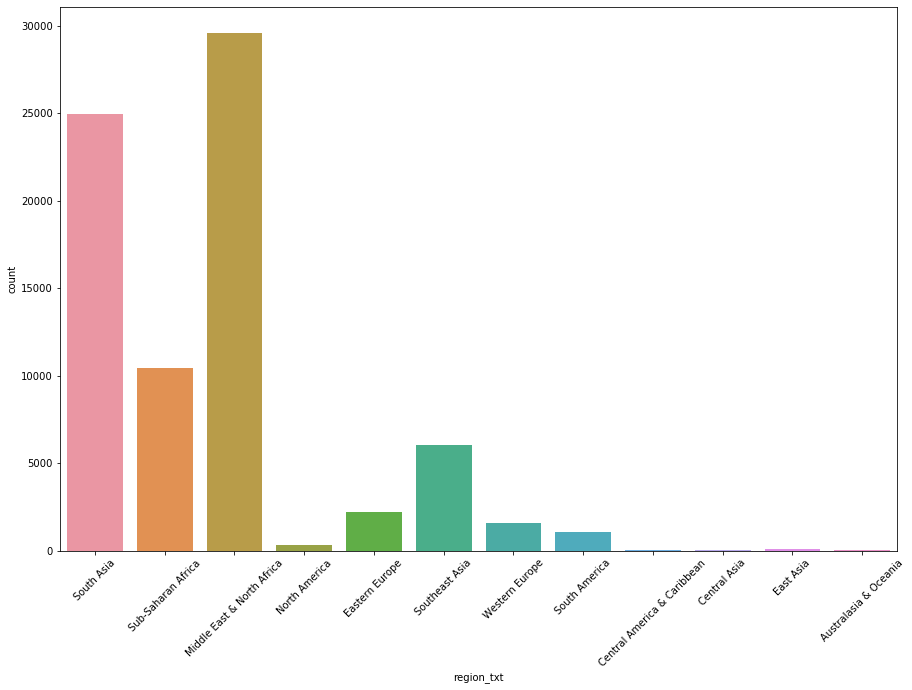

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
ch = sns.countplot(x="region_txt", data=data)
ch.set_xticklabels(ch.get_xticklabels(), rotation=45)

[Text(0, 0, 'Bombing/Explosion'),
 Text(0, 0, 'Armed Assault'),
 Text(0, 0, 'Hostage Taking (Kidnapping)'),
 Text(0, 0, 'Assassination'),
 Text(0, 0, 'Facility/Infrastructure Attack'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Hijacking'),
 Text(0, 0, 'Unarmed Assault'),
 Text(0, 0, 'Hostage Taking (Barricade Incident)')]

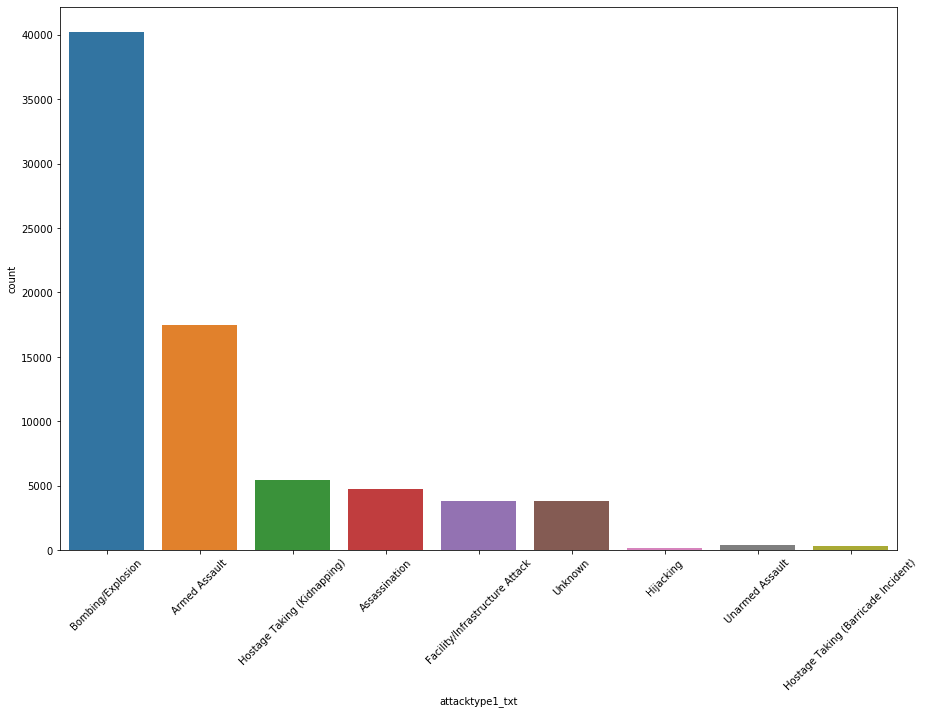

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
ch = sns.countplot(x="attacktype1_txt", data=data)
ch.set_xticklabels(ch.get_xticklabels(), rotation=45)

In [25]:
paises = categoricas['country_txt'].value_counts().to_frame()
paises['name'] = paises.index
paises = paises[paises['country_txt'] > 1000]

#para ataques es un poco mas complicado 
ataques = data['success'].value_counts().to_frame()
ataques['name'] = ataques.index
test = pd.DataFrame(columns=['ataque', 'cantidad'])

for i in paises['name']:
    for j in ataques['name']:
        temporal = categoricas[(categoricas['country_txt'] == i) & (data['success'] == j)]['attacktype1_txt']
        numero = temporal.value_counts().sum()
        test = test.append(pd.DataFrame({
            'ataque': j,
            'cantidad': numero, 
        }, index=[0]))

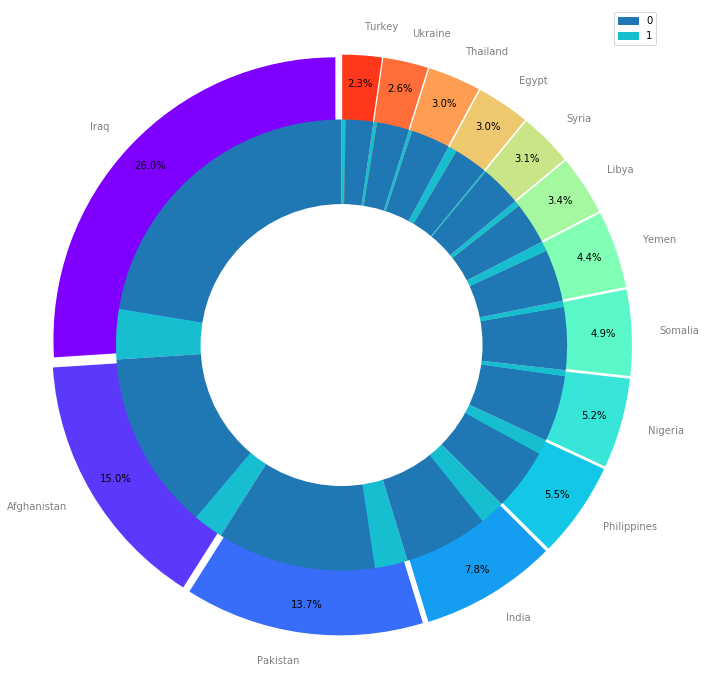

In [26]:
cmap = plt.get_cmap('rainbow')
cmap2 = plt.get_cmap('tab10')
colors = [cmap(i) for i in np.linspace(0, 1, 15)]
colors2 = [cmap2(i) for i in np.linspace(0, 1, 2)]
colorsm = colors2 * 9
explode = [0.03 for i in range(paises.shape[0])]

identif = [mpatches.Patch(color=colors2[i], label=ataques['name'][i]) for i in range(len(colors2))]

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax1.pie(paises['country_txt'], labels=paises['name'], autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors, pctdistance=0.90, explode = explode, frame=True)
patches2, texts2, autotexts2 = ax1.pie(test['cantidad'], autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colorsm, pctdistance=0.5, radius=0.8)

for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('black')
    
for autotext2 in autotexts2:
    autotext2.set_color('white')
    
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
    
plt.legend(handles=identif)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<BarContainer object of 14 artists>

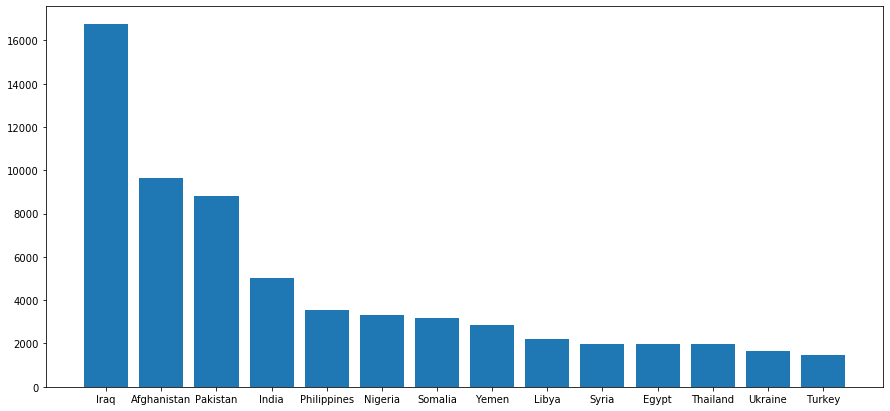

In [27]:
# verlo como una grafica de barras 

fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.bar(paises['name'], paises['country_txt'])

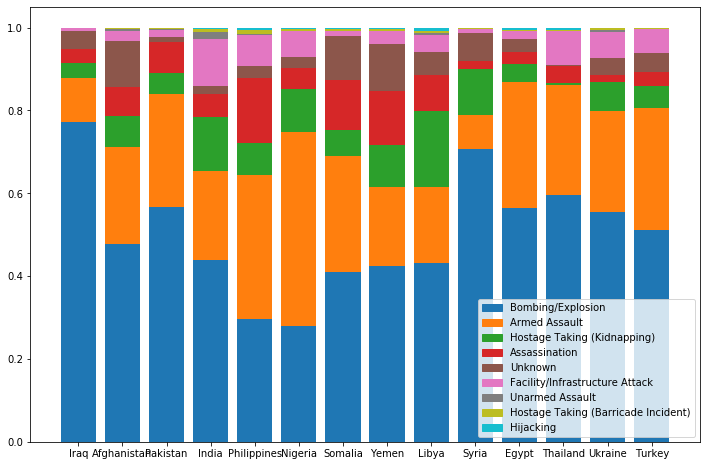

In [28]:
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in np.linspace(0, 1, 9)]

paises = categoricas['country_txt'].value_counts().to_frame()
paises['name'] = paises.index
paises = paises[paises['country_txt'] > 1000]

attacks = categoricas['attacktype1_txt'].value_counts().to_frame()
attacks['name'] = attacks.index

master = []

testing = pd.DataFrame(columns=['name', 'cantidad'])

for j in range(attacks.shape[0]):
    testing = pd.DataFrame(columns=['name', 'cantidad'])
    cont = 0
    for i in paises['name']:
        prop = paises['country_txt'][cont]
        cont += 1
        temporal = data[(data.country_txt == i) & (data.attacktype1_txt == attacks['name'][j])]['attacktype1_txt']
        testing = testing.append(pd.DataFrame({
            'name': attacks['name'][j] ,
            'cantidad': np.round(temporal.value_counts().sum() / prop,10)
        }, index=[attacks['name'][j] + i]))
    master.append(testing)
    

countries = [i for i in paises['name']]
info = {
    'countries':countries
}

columnas = ['countries']
for i in attacks['name']:
    columnas.append(i)


for i in range(len(attacks['name'])):
    info[attacks['name'][i]] = [j for j in master[i]['cantidad']]
    
dataf = pd.DataFrame(info, columns=columnas)

bar_1 = np.arange(14)
f, ax1 = plt.subplots(1, figsize=(12,8))
ax1.bar(dataf['countries'], dataf['Bombing/Explosion'], color=colors[0])
ax1.bar(dataf['countries'], dataf['Armed Assault'], bottom=dataf['Bombing/Explosion'], color=colors[1])
ax1.bar(dataf['countries'], dataf['Hostage Taking (Kidnapping)'], bottom =[i + j for i,j in zip(dataf['Bombing/Explosion'], dataf['Armed Assault'])], color=colors[2])
ax1.bar(dataf['countries'], dataf['Assassination'], bottom =[i + j + k for i,j,k in zip(dataf['Bombing/Explosion'], dataf['Armed Assault'], dataf['Hostage Taking (Kidnapping)'])], color=colors[3])
ax1.bar(dataf['countries'], dataf['Unknown'], bottom =[i + j + k + l for i,j,k,l in zip(dataf['Bombing/Explosion'], dataf['Armed Assault'], dataf['Hostage Taking (Kidnapping)'], dataf['Assassination'])], color=colors[4])
ax1.bar(dataf['countries'], dataf['Facility/Infrastructure Attack'], bottom =[i + j + k + l + m for i,j,k,l,m in zip(dataf['Bombing/Explosion'], dataf['Armed Assault'], dataf['Hostage Taking (Kidnapping)'], dataf['Assassination'], dataf['Unknown'])], color=colors[5])
ax1.bar(dataf['countries'], dataf['Unarmed Assault'], bottom =[i + j + k + l + m + n for i,j,k,l,m,n in zip(dataf['Bombing/Explosion'], dataf['Armed Assault'], dataf['Hostage Taking (Kidnapping)'], dataf['Assassination'], dataf['Unknown'], dataf['Facility/Infrastructure Attack'])], color=colors[6])
ax1.bar(dataf['countries'], dataf['Hostage Taking (Barricade Incident)'], bottom =[i + j + k + l + m + n + o for i,j,k,l,m,n,o in zip(dataf['Bombing/Explosion'], dataf['Armed Assault'], dataf['Hostage Taking (Kidnapping)'], dataf['Assassination'], dataf['Unknown'], dataf['Facility/Infrastructure Attack'], dataf['Unarmed Assault'])], color=colors[7])
ax1.bar(dataf['countries'], dataf['Hijacking'], bottom =[i + j + k + l + m + n + o + p for i,j,k,l,m,n,o,p in zip(dataf['Bombing/Explosion'], dataf['Armed Assault'], dataf['Hostage Taking (Kidnapping)'], dataf['Assassination'], dataf['Unknown'], dataf['Facility/Infrastructure Attack'], dataf['Unarmed Assault'], dataf['Hostage Taking (Barricade Incident)'])], color=colors[8])

info = [mpatches.Patch(color=colors[i], label=attacks['name'][i]) for i in range(len(colors))]
plt.legend(handles=info)

In [29]:
# mapa test 

#caja = ((data['longitude'].min(),   df.longitude.max(),      
#         df.latitude.min(), df.latitude.max())

caja = (np.min(data['longitude']), np.max(data['longitude']),
        np.min(data['latitude']), np.max(data['latitude']))
caja2 = (-7.4,95.9,-3.9, 52.5)
np.round(caja, 6)

array([-124.224996,  176.986756,  -42.884049,   65.825119])

In [30]:
mapita = plt.imread('./lado4.png')

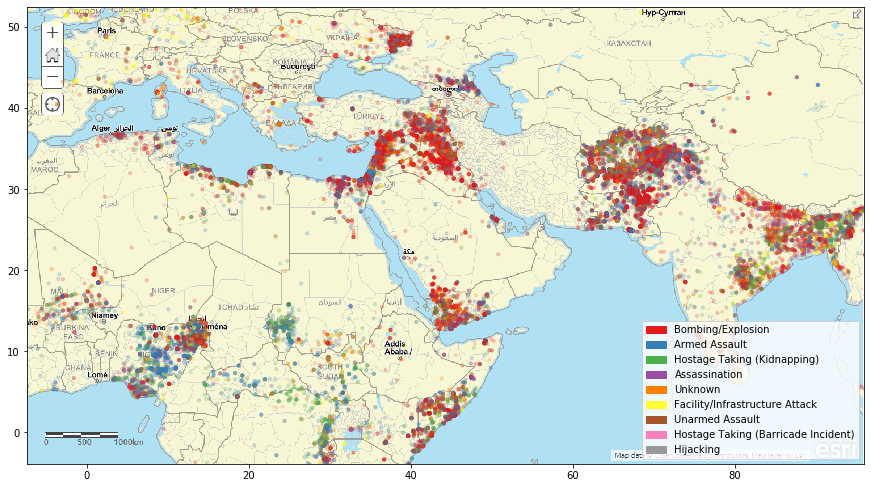

In [31]:
utilizar = data[(data['longitude'] >= -67) & (data['longitude'] <= 175) & (data['latitude'] >= -35) & (data['latitude'] <= 59)]
colores_d = utilizar.copy()
colores_d["colors"] = np.nan

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#coloresM = ['#2E5A5A', '#4A736D', '#A3C2B0', '#F3EFAE', '#EF924D', '#C64634', '#ECE1B6', '#7EC1AF', '#CFA982']
viridis = cm.get_cmap('Set1', 9)
intermedio = np.linspace(0,1,9)
colores_mapa = viridis(intermedio)

for i in range(9):
    nop = cm.colors.to_hex(viridis(intermedio[i]))
    colores_d.loc[colores_d.attacktype1_txt == attacks['name'][i], 'colors'] = str(nop) 
    
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(utilizar['longitude'], utilizar['latitude'], zorder=1, alpha= 0.2, c=colores_d.colors, s=10)
ax.set_xlim(caja2[0],caja2[1])
ax.set_ylim(caja2[2],caja2[3])
ax.imshow(mapita, zorder=0, extent = caja2, aspect='equal')

info = [mpatches.Patch(color=colores_mapa[i], label=attacks['name'][i]) for i in range(len(colores_mapa))]
plt.legend(handles=info)

In [162]:
for i in data:
    print(i)

iyear
imonth
iday
extended
country_txt
region_txt
latitude
longitude
crit1
crit2
crit3
doubtterr
multiple
success
suicide
attacktype1_txt
targtype1_txt
natlty1_txt
guncertain1
individual
nperps
nperpcap
claimed
weaptype1_txt
nkill
nkillus
nkillter
nwound
nwoundus
nwoundte
property
ishostkid
INT_LOG
INT_IDEO
INT_MISC
INT_ANY


Text(0, 0.5, 'Frequency de Ataques')

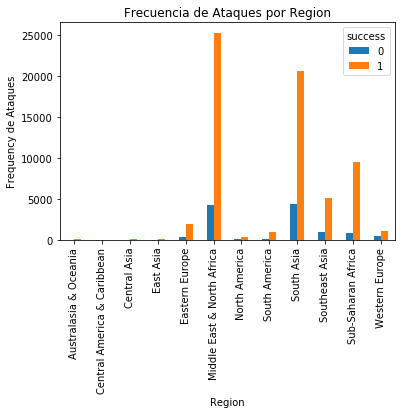

In [164]:
# ver que variables me pueden servir para predecir el success 

pd.crosstab(data.region_txt,data.success).plot(kind='bar')
plt.title('Frecuencia de Ataques por Region')
plt.xlabel('Region')
plt.ylabel('Frequency de Ataques')

Text(0, 0.5, 'Frequency de Ataques')

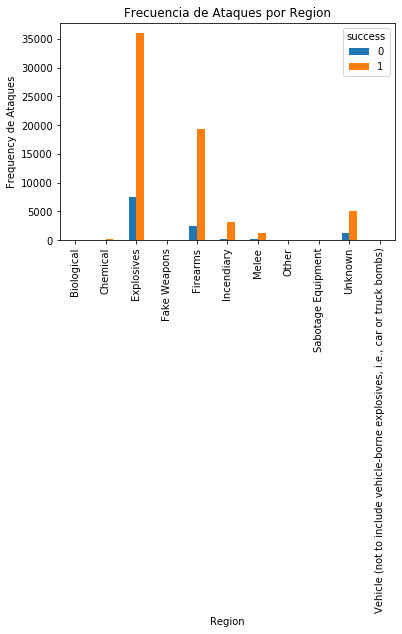

In [173]:
pd.crosstab(data.weaptype1_txt,data.success).plot(kind='bar')
plt.title('Frecuencia de Ataques por Region')
plt.xlabel('Region')
plt.ylabel('Frequency de Ataques')

In [32]:
#PREDICION DE VARIABLES SUCCESS Y ATTACKTYPE1
# primero hay que definir si hay alguna categoria nominal 
# TODAS LAS VARIABLES CATEGORICAS SON NOMINALES 

data.apply(pd.Series.nunique)

iyear                  6
imonth                12
iday                  31
extended               2
country_txt          145
region_txt            12
latitude           30287
longitude          29971
crit1                  2
crit2                  2
crit3                  2
doubtterr              2
multiple               2
success                2
suicide                2
attacktype1_txt        9
targtype1_txt         22
natlty1_txt          160
guncertain1            2
individual             2
nperps                77
nperpcap              32
claimed                2
weaptype1_txt         11
nkill                156
nkillus               11
nkillter              91
nwound               157
nwoundus              21
nwoundte              42
property               3
ishostkid              3
INT_LOG                3
INT_IDEO               3
INT_MISC               2
INT_ANY                3
dtype: int64

In [33]:
# Utilizar One Hot Encoding para la columna de attacktype1_txt
type_dummies = pd.get_dummies(data['attacktype1_txt'], prefix='type')

In [34]:
data_final = data.copy()
data_final.drop(columns=['attacktype1_txt'], inplace=True)
data_final = pd.concat([data_final, type_dummies], axis = 1)

In [35]:
data_final.head()

,iyear,imonth,iday,extended,country_txt,region_txt,latitude,longitude,crit1,crit2,crit3,doubtterr,multiple,success,suicide,targtype1_txt,natlty1_txt,guncertain1,individual,nperps,nperpcap,claimed,weaptype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,type_Armed Assault,type_Assassination,type_Bombing/Explosion,type_Facility/Infrastructure Attack,type_Hijacking,type_Hostage Taking (Barricade Incident),type_Hostage Taking (Kidnapping),type_Unarmed Assault,type_Unknown
104778,2012,1,1,0,Pakistan,South Asia,30.200819,66.994354,1,1,1,0.0,0.0,1,0,Business,Pakistan,0.0,0,-99.0,0.0,0.0,Explosives,0.0,0.0,0.0,12.0,0.0,0.0,1,0.0,-9,-9,0,-9,0,0,1,0,0,0,0,0,0
104779,2012,1,1,0,Kenya,Sub-Saharan Africa,-0.456120,39.646123,1,1,1,0.0,1.0,1,0,Business,Kenya,1.0,0,-99.0,0.0,0.0,Explosives,3.0,0.0,0.0,14.0,0.0,0.0,1,0.0,1,1,0,1,1,0,0,0,0,0,0,0,0
104780,2012,1,1,0,Pakistan,South Asia,28.633307,69.190369,1,1,0,1.0,0.0,1,0,Military,Pakistan,0.0,0,-99.0,0.0,1.0,Explosives,4.0,0.0,0.0,3.0,0.0,0.0,1,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0
104781,2012,1,1,0,Kenya,Sub-Saharan Africa,-0.456120,39.646123,1,1,1,0.0,1.0,1,0,Business,Kenya,1.0,0,-99.0,0.0,0.0,Explosives,2.0,0.0,0.0,14.0,0.0,0.0,1,0.0,1,1,0,1,1,0,0,0,0,0,0,0,0
104782,2012,1,1,1,Pakistan,South Asia,28.466667,67.283333,1,1,1,0.0,0.0,1,0,Private Citizens & Property,Pakistan,0.0,0,-99.0,0.0,0.0,Firearms,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,-9,-9,0,-9,0,0,0,0,0,0,1,0,0


In [36]:
region_dummies = pd.get_dummies(data['region_txt'], prefix='region')
data_final.drop(columns=['region_txt'], inplace=True)
data_final = pd.concat([data_final, region_dummies], axis = 1)

In [37]:
data_final.head()

,iyear,imonth,iday,extended,country_txt,latitude,longitude,crit1,crit2,crit3,doubtterr,multiple,success,suicide,targtype1_txt,natlty1_txt,guncertain1,individual,nperps,nperpcap,claimed,weaptype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,type_Armed Assault,type_Assassination,type_Bombing/Explosion,type_Facility/Infrastructure Attack,type_Hijacking,type_Hostage Taking (Barricade Incident),type_Hostage Taking (Kidnapping),type_Unarmed Assault,type_Unknown,region_Australasia & Oceania,region_Central America & Caribbean,region_Central Asia,region_East Asia,region_Eastern Europe,region_Middle East & North Africa,region_North America,region_South America,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe
104778,2012,1,1,0,Pakistan,30.200819,66.994354,1,1,1,0.0,0.0,1,0,Business,Pakistan,0.0,0,-99.0,0.0,0.0,Explosives,0.0,0.0,0.0,12.0,0.0,0.0,1,0.0,-9,-9,0,-9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
104779,2012,1,1,0,Kenya,-0.456120,39.646123,1,1,1,0.0,1.0,1,0,Business,Kenya,1.0,0,-99.0,0.0,0.0,Explosives,3.0,0.0,0.0,14.0,0.0,0.0,1,0.0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
104780,2012,1,1,0,Pakistan,28.633307,69.190369,1,1,0,1.0,0.0,1,0,Military,Pakistan,0.0,0,-99.0,0.0,1.0,Explosives,4.0,0.0,0.0,3.0,0.0,0.0,1,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
104781,2012,1,1,0,Kenya,-0.456120,39.646123,1,1,1,0.0,1.0,1,0,Business,Kenya,1.0,0,-99.0,0.0,0.0,Explosives,2.0,0.0,0.0,14.0,0.0,0.0,1,0.0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
104782,2012,1,1,1,Pakistan,28.466667,67.283333,1,1,1,0.0,0.0,1,0,Private Citizens & Property,Pakistan,0.0,0,-99.0,0.0,0.0,Firearms,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,-9,-9,0,-9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [38]:
import category_encoders as ce

In [39]:
encoder = ce.BinaryEncoder(cols=['country_txt', 'natlty1_txt', 'targtype1_txt'])
binariof = encoder.fit_transform(data_final)
binariof.shape
data_final = binariof.copy()

In [40]:
weapon_dummies = pd.get_dummies(data['weaptype1_txt'], prefix='weapon')
data_final.drop(columns=['weaptype1_txt'], inplace=True)
data_final = pd.concat([data_final, weapon_dummies], axis = 1)

In [41]:
data_final.apply(pd.Series.nunique)

iyear                                                                                     6
imonth                                                                                   12
iday                                                                                     31
extended                                                                                  2
country_txt_0                                                                             1
country_txt_1                                                                             2
country_txt_2                                                                             2
country_txt_3                                                                             2
country_txt_4                                                                             2
country_txt_5                                                                             2
country_txt_6                                                                   

In [42]:
data_final.shape

(76434, 86)

In [121]:
# COMIENZA LA PREDICCION, VOY A QUITAR VARIABLES QUE NO TIENE SENTIDO TENER 
data_reduccion = data_final.copy()

no_sentido = ['latitude', 'longitude', 'nperpcap', 'claimed', 
             'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 
             'nwoundte', 'property', 'ishostkid', 'INT_LOG', 'INT_IDEO',
             'INT_MISC', 'INT_ANY']

data_reduccion.drop(no_sentido, 1, inplace=True)

In [122]:
from sklearn.preprocessing import MinMaxScaler
variables = ['iyear', 'imonth', 'iday', 
            'nperps']

values = data_reduccion.loc[:,variables].values
scaler = MinMaxScaler(feature_range=(0,1)).fit(values)
normalized = scaler.transform(values)
reducido = pd.DataFrame(normalized, columns=variables)

In [123]:
data_reduccion.reset_index(drop=True, inplace=True)
reducido.reset_index(drop=True, inplace=True)

data_reduccion.drop(variables, 1, inplace=True)
data_reduccion = pd.concat([data_reduccion, reducido], axis=1)

ys = ['success', 'type_Armed Assault', 'type_Assassination', 'type_Bombing/Explosion',
     'type_Facility/Infrastructure Attack', 'type_Hijacking', 'type_Hostage Taking (Barricade Incident)',
     'type_Hostage Taking (Kidnapping)', 'type_Unarmed Assault', 'type_Unknown']
data_final_y = data_reduccion.loc[:,ys]
data_final_x = data_reduccion.drop(ys, 1)

In [152]:
# ya esta todo listo para la reduccion de dimensionalidad 

from sklearn.decomposition import PCA, KernelPCA
pca = PCA()
x_pca = pca.fit_transform(data_final_x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.057275,-1.291718,0.163225,-0.090076,-0.135249,0.383871,-0.432683,-0.252286,0.775345,0.625469,0.128519,-0.336628,-0.058732,-0.170562,-0.244303,0.226454,-0.380161,0.511555,-0.350787,-0.189765,-0.212000,0.003199,0.015335,-0.035830,-0.052562,-0.006611,-0.080728,-0.068748,-0.046705,0.023226,-0.035344,-0.143474,0.012219,-0.007031,0.013700,0.003940,-0.004269,0.006428,0.007035,0.007710,0.000564,0.000569,0.001702,-0.000360,-0.000988,0.001745,-0.002300,0.000226,-0.000173,-0.000377,-0.000060,0.000171,-0.001877,-0.000096,0.000023,1.564390e-14,3.212737e-14,-3.719407e-17,-1.568463e-17,-1.286044e-17
1,-0.350932,0.049847,-0.478294,-0.294549,0.697588,-0.837184,-0.733690,-0.154185,0.573866,0.190970,0.424938,0.348834,-1.183886,-0.455730,-0.166858,0.077664,-0.230548,0.720616,-0.325734,-0.276111,-0.257277,-0.371805,0.191551,0.254804,-0.025254,-0.498831,0.611012,-0.001292,0.177231,-0.045351,0.069115,-0.144171,0.026157,-0.038790,-0.006854,-0.068590,-0.022988,-0.002482,0.000865,-0.024104,0.003194,0.001560,0.007356,-0.006575,0.012240,0.005648,-0.000334,-0.000535,-0.000071,-0.001023,0.000836,-0.001354,-0.002485,-0.000134,-0.000207,5.155277e-15,-1.147353e-14,1.082287e-13,1.359236e-15,1.199492e-15
2,0.042585,-0.609799,1.776470,0.239462,-0.373679,0.286501,-0.301636,0.067643,0.498728,0.033456,-0.056825,-0.152942,0.074556,-0.112744,-0.247452,0.279594,-0.350116,0.686310,-0.350378,-0.154069,-0.026276,-0.038662,-0.028662,-0.047131,-0.057893,0.018883,-0.045357,0.072056,-0.025427,0.046419,-0.040946,-0.001704,0.013240,-0.003697,-0.054625,-0.001565,-0.005003,0.011896,0.000967,0.002520,0.000767,-0.000816,0.002111,-0.003945,0.000448,0.001222,-0.001742,0.000762,0.000893,0.000218,-0.000120,0.000154,-0.001039,-0.000041,-0.000029,-2.831189e-14,-5.451780e-16,2.925952e-18,-2.085379e-18,-4.693044e-18
3,-0.350932,0.049847,-0.478294,-0.294549,0.697588,-0.837184,-0.733690,-0.154185,0.573866,0.190970,0.424938,0.348834,-1.183886,-0.455730,-0.166858,0.077664,-0.230548,0.720616,-0.325734,-0.276111,-0.257277,-0.371805,0.191551,0.254804,-0.025254,-0.498831,0.611012,-0.001292,0.177231,-0.045351,0.069115,-0.144171,0.026157,-0.038790,-0.006854,-0.068590,-0.022988,-0.002482,0.000865,-0.024104,0.003194,0.001560,0.007356,-0.006575,0.012240,0.005648,-0.000334,-0.000535,-0.000071,-0.001023,0.000836,-0.001354,-0.002485,-0.000134,-0.000207,-1.091224e-14,1.302165e-14,-3.605235e-17,-7.586259e-18,-8.485702e-18
4,0.467490,-0.954654,-0.016534,1.223690,-0.237116,0.323363,-0.002024,-0.547671,0.551001,-0.021092,-0.274091,-0.156449,0.160911,-0.014158,0.142518,0.233924,-0.387343,0.487932,-0.344351,-0.346568,-0.298659,0.096083,0.529827,-0.124614,0.026281,0.324286,0.026254,0.500854,-0.153679,-0.008395,-0.023347,-0.054618,0.000452,0.023785,-0.003333,0.016613,0.003181,0.006376,0.013824,0.012880,0.002367,0.001925,0.001783,0.000676,0.001357,0.002842,-0.001964,-0.000401,0.001493,0.001021,-0.000507,0.001047,-0.004665,-0.000129,0.000209,1.492105e-14,-5.632139e-14,-9.996571e-17,-3.415040e-17,-2.935507e-17


In [153]:
explained_variance = pca.explained_variance_ratio_
sum(explained_variance[0:25])

0.9341466494278132

In [154]:
keep = x_pca.iloc[:,0:25]
data_probar = pd.concat([keep, data_final_y], axis=1)
data_probar.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,success,type_Armed Assault,type_Assassination,type_Bombing/Explosion,type_Facility/Infrastructure Attack,type_Hijacking,type_Hostage Taking (Barricade Incident),type_Hostage Taking (Kidnapping),type_Unarmed Assault,type_Unknown
0,0.057275,-1.291718,0.163225,-0.090076,-0.135249,0.383871,-0.432683,-0.252286,0.775345,0.625469,0.128519,-0.336628,-0.058732,-0.170562,-0.244303,0.226454,-0.380161,0.511555,-0.350787,-0.189765,-0.212000,0.003199,0.015335,-0.035830,-0.052562,1,0,0,1,0,0,0,0,0,0
1,-0.350932,0.049847,-0.478294,-0.294549,0.697588,-0.837184,-0.733690,-0.154185,0.573866,0.190970,0.424938,0.348834,-1.183886,-0.455730,-0.166858,0.077664,-0.230548,0.720616,-0.325734,-0.276111,-0.257277,-0.371805,0.191551,0.254804,-0.025254,1,1,0,0,0,0,0,0,0,0
2,0.042585,-0.609799,1.776470,0.239462,-0.373679,0.286501,-0.301636,0.067643,0.498728,0.033456,-0.056825,-0.152942,0.074556,-0.112744,-0.247452,0.279594,-0.350116,0.686310,-0.350378,-0.154069,-0.026276,-0.038662,-0.028662,-0.047131,-0.057893,1,0,0,1,0,0,0,0,0,0
3,-0.350932,0.049847,-0.478294,-0.294549,0.697588,-0.837184,-0.733690,-0.154185,0.573866,0.190970,0.424938,0.348834,-1.183886,-0.455730,-0.166858,0.077664,-0.230548,0.720616,-0.325734,-0.276111,-0.257277,-0.371805,0.191551,0.254804,-0.025254,1,1,0,0,0,0,0,0,0,0
4,0.467490,-0.954654,-0.016534,1.223690,-0.237116,0.323363,-0.002024,-0.547671,0.551001,-0.021092,-0.274091,-0.156449,0.160911,-0.014158,0.142518,0.233924,-0.387343,0.487932,-0.344351,-0.346568,-0.298659,0.096083,0.529827,-0.124614,0.026281,1,0,0,0,0,0,0,1,0,0


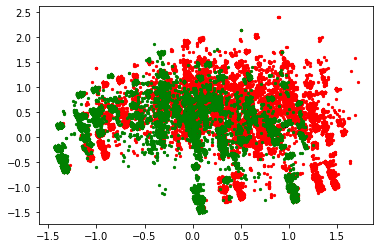

In [155]:
%matplotlib inline
 
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data_probar['type_Bombing/Explosion'] == target
    plt.scatter(x_pca.loc[indicesToKeep, 0]
               , x_pca.loc[indicesToKeep, 1]
               , c = color
               , s = 5)

In [160]:
data_probar.shape

(76434, 35)

In [161]:
data_final.groupby('success').mean()

,iyear,imonth,iday,extended,country_txt_0,country_txt_1,country_txt_2,country_txt_3,country_txt_4,country_txt_5,country_txt_6,country_txt_7,country_txt_8,latitude,longitude,crit1,crit2,crit3,doubtterr,multiple,suicide,targtype1_txt_0,targtype1_txt_1,targtype1_txt_2,targtype1_txt_3,targtype1_txt_4,targtype1_txt_5,natlty1_txt_0,natlty1_txt_1,natlty1_txt_2,natlty1_txt_3,natlty1_txt_4,natlty1_txt_5,natlty1_txt_6,natlty1_txt_7,natlty1_txt_8,guncertain1,individual,nperps,nperpcap,claimed,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,type_Armed Assault,type_Assassination,type_Bombing/Explosion,type_Facility/Infrastructure Attack,type_Hijacking,type_Hostage Taking (Barricade Incident),type_Hostage Taking (Kidnapping),type_Unarmed Assault,type_Unknown,region_Australasia & Oceania,region_Central America & Caribbean,region_Central Asia,region_East Asia,region_Eastern Europe,region_Middle East & North Africa,region_North America,region_South America,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe,weapon_Biological,weapon_Chemical,weapon_Explosives,weapon_Fake Weapons,weapon_Firearms,weapon_Incendiary,weapon_Melee,weapon_Other,weapon_Sabotage Equipment,weapon_Unknown,"weapon_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
success,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2014.947115,6.517483,16.039860,0.002010,0.0,0.000962,0.013724,0.123514,0.197115,0.236451,0.464336,0.541521,0.569930,28.018430,54.759968,0.992832,0.997990,0.850262,0.163462,0.138462,0.079108,0.0,0.033829,0.077885,0.590297,0.785490,0.429196,0.0,0.001836,0.038724,0.110839,0.241783,0.251748,0.281906,0.523252,0.664948,0.033566,0.004021,-78.449913,-0.225874,0.111626,0.995629,0.000350,0.882780,0.575699,0.000874,0.189336,-0.373514,-0.007343,-5.695717,-5.583654,0.085490,-5.000437,0.146766,0.171591,0.562063,0.013024,0.001486,0.000262,0.009178,0.002797,0.092832,0.000350,0.000524,0.001661,0.001049,0.024825,0.375699,0.003671,0.009878,0.384965,0.078322,0.077273,0.041783,0.000262,0.001049,0.649650,0.000087,0.211014,0.016259,0.015647,0.000524,0.000262,0.104021,0.001224
1,2014.535111,6.423285,15.702711,0.070622,0.0,0.000569,0.017325,0.121227,0.193172,0.297043,0.410607,0.520263,0.554513,26.027341,51.226033,0.990091,0.995846,0.831184,0.190218,0.187525,0.055436,0.0,0.035819,0.103563,0.343662,0.737314,0.663046,0.0,0.001262,0.049605,0.102225,0.225236,0.316752,0.272071,0.538111,0.645829,0.052666,0.004016,-79.374327,-0.294566,0.194956,2.736191,0.010001,0.609533,3.463858,0.012232,0.130012,-1.255208,0.060006,-4.706404,-4.569637,0.062806,-4.310598,0.243499,0.043296,0.519217,0.055897,0.002923,0.004785,0.082561,0.005493,0.042327,0.000646,0.000323,0.000646,0.001431,0.029787,0.389251,0.004616,0.014801,0.316414,0.078730,0.146629,0.016725,0.000000,0.001754,0.554251,0.000031,0.295981,0.049112,0.018663,0.000692,0.000508,0.077899,0.001108


In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(data_probar[X], data_probar[y], test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

d:\cs7\machine learning models\mlenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [192]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  771  2621]
 [  427 19112]]
